<a href="https://colab.research.google.com/github/kangand/1000ml/blob/master/baseline_routes/Route_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create GPS Data Frame

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='w'
plt.rc('axes', axisbelow=True)

In [0]:
import glob
import os

In [0]:
path = r'gps'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent


In [0]:
df_list = []

for i in all_files:
  df=pd.read_csv(i)
  df_list.append(df)

In [6]:
print(df_list[2])

         latitude   longitude  ...         device         id
0       49.207424 -123.112015  ...  {'id': 'b5C'}        NaN
1       49.207424 -123.112015  ...  {'id': 'b5C'}  b199F3DF6
2       49.207424 -123.112015  ...  {'id': 'b5C'}  b199F4995
3       49.207424 -123.112015  ...  {'id': 'b5C'}  b199F54DC
4       49.207424 -123.112015  ...  {'id': 'b5C'}  b199F5EF5
...           ...         ...  ...            ...        ...
172157  49.207397 -123.111526  ...  {'id': 'b5C'}  b1BCC61E3
172158  49.207397 -123.111526  ...  {'id': 'b5C'}  b1BCC8D83
172159  49.207397 -123.111526  ...  {'id': 'b5C'}  b1BCCAF3D
172160  49.207397 -123.111526  ...  {'id': 'b5C'}  b1BCCC2E3
172161  49.207397 -123.111526  ...  {'id': 'b5C'}        NaN

[172162 rows x 6 columns]


In [0]:
# name with serial numbers

for i,j in zip(df_list,all_files):
  i['SerialNo'] = f'{j[4:-4]}'

In [8]:
# check values

print(df_list[1])

         latitude   longitude  speed  ...         device         id      SerialNo
0       49.207451 -123.111755    0.0  ...  {'id': 'b18'}        NaN  G7C020D84E76
1       49.207451 -123.111755    0.0  ...  {'id': 'b18'}  b19A02099  G7C020D84E76
2       49.207451 -123.111755    0.0  ...  {'id': 'b18'}  b19A020B3  G7C020D84E76
3       49.207554 -123.111862    0.0  ...  {'id': 'b18'}  b19A020B4  G7C020D84E76
4       49.207554 -123.111862    0.0  ...  {'id': 'b18'}  b19A020BB  G7C020D84E76
...           ...         ...    ...  ...            ...        ...           ...
270868  49.209702 -123.111679    0.0  ...  {'id': 'b18'}  b1BCC7219  G7C020D84E76
270869  49.209702 -123.111679    0.0  ...  {'id': 'b18'}  b1BCC724E  G7C020D84E76
270870  49.209679 -123.111679    0.0  ...  {'id': 'b18'}  b1BCCA51F  G7C020D84E76
270871  49.209679 -123.111679    0.0  ...  {'id': 'b18'}  b1BCCBCE3  G7C020D84E76
270872  49.209679 -123.111679    0.0  ...  {'id': 'b18'}        NaN  G7C020D84E76

[270873 rows x 

In [0]:
# concat

frame = pd.concat(df_list, axis=0, ignore_index=True)

In [10]:
frame.shape

(4914741, 7)

In [11]:
frame['SerialNo'].value_counts()

#ok all seems to check out

G7C020D84E76    270873
G76920D84DDE    208907
G7EC20D84553    208907
G7A520D84E13    203447
G7BD20D84E0B    202174
G7B820D84404    199120
G7CD20D84370    193961
G7AF20D84E19    193865
G75C20D843E1    187000
G7E920D84354    187000
G7E320D84E55    186541
G74D20D84DFA    186541
G72C20DF9C73    182860
G7DC20D84361    182860
G7DE20D84E68    178013
G74620D84DF1    178013
G7EF20D84352    172162
G78520D84439    172162
G7D620D8446A    162425
G7D920D84465    162042
G70320DBFC00    162042
G74120D843FC    146568
G7DC20D84E6A    146568
G79220D8442E    139673
G7C220D84E74    132603
G75220D84DE5    124983
G7E520D84459    124983
G7E220D8445E     59224
G74C20DBFC4F     59224
Name: SerialNo, dtype: int64

In [12]:
frame.head()

latitude   longitude  speed  ...         device         id      SerialNo
0  49.207424 -123.112015    0.0  ...  {'id': 'b5C'}        NaN  G7EF20D84352
1  49.207424 -123.112015    0.0  ...  {'id': 'b5C'}  b199F3DF6  G7EF20D84352
2  49.207424 -123.112015    0.0  ...  {'id': 'b5C'}  b199F4995  G7EF20D84352
3  49.207424 -123.112015    0.0  ...  {'id': 'b5C'}  b199F54DC  G7EF20D84352
4  49.207424 -123.112015    0.0  ...  {'id': 'b5C'}  b199F5EF5  G7EF20D84352

[5 rows x 7 columns]

In [0]:

# drop device and id
# convert datetime
# group by serial no
# extract necessary weather event date and co

In [0]:
frame.drop(columns = ['device', 'id'], inplace = True)

In [15]:
frame.shape

(4914741, 5)

In [0]:
frame['dateTime'] = frame['dateTime'].str.slice(0,19)

In [0]:
frame['dateTime'] = pd.to_datetime(frame['dateTime'])

In [0]:
gps_df = frame

In [0]:
gps_df['Month'] = pd.DatetimeIndex(gps_df['dateTime']).month
gps_df['Year'] = pd.DatetimeIndex(gps_df['dateTime']).year
gps_df['Weekday'] = pd.DatetimeIndex(gps_df['dateTime']).weekday
gps_df['Day'] = pd.DatetimeIndex(gps_df['dateTime']).dayofyear
gps_df['Hour'] = pd.DatetimeIndex(gps_df['dateTime']).hour

In [20]:
gps_df['Month'].value_counts()

5    2616059
4    2298682
Name: Month, dtype: int64

In [21]:
gps_df.head()

latitude   longitude  speed            dateTime  ...  Year  Weekday  Day  Hour
0  49.207424 -123.112015    0.0 2019-04-01 00:00:00  ...  2019        0   91     0
1  49.207424 -123.112015    0.0 2019-04-01 00:19:20  ...  2019        0   91     0
2  49.207424 -123.112015    0.0 2019-04-01 00:49:21  ...  2019        0   91     0
3  49.207424 -123.112015    0.0 2019-04-01 01:19:21  ...  2019        0   91     1
4  49.207424 -123.112015    0.0 2019-04-01 01:49:21  ...  2019        0   91     1

[5 rows x 10 columns]

# Various Route Visualizations

In [0]:
apr18 = gps_df[gps_df['Day'] == 108 ]
may7 = gps_df[gps_df['Day'] == 127]



In [23]:
pip install geopandas

     |████████████████████████████████| 931kB 5.3MB/s 
     |████████████████████████████████| 10.9MB 17.2MB/s 
     |████████████████████████████████| 14.7MB 304kB/s 


In [0]:
# mapping begins

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [0]:
street_map = gpd.read_file('data/GM_TruckRoutes.shp')

In [0]:
palette = sns.color_palette('hls', gps_df['SerialNo'].nunique())

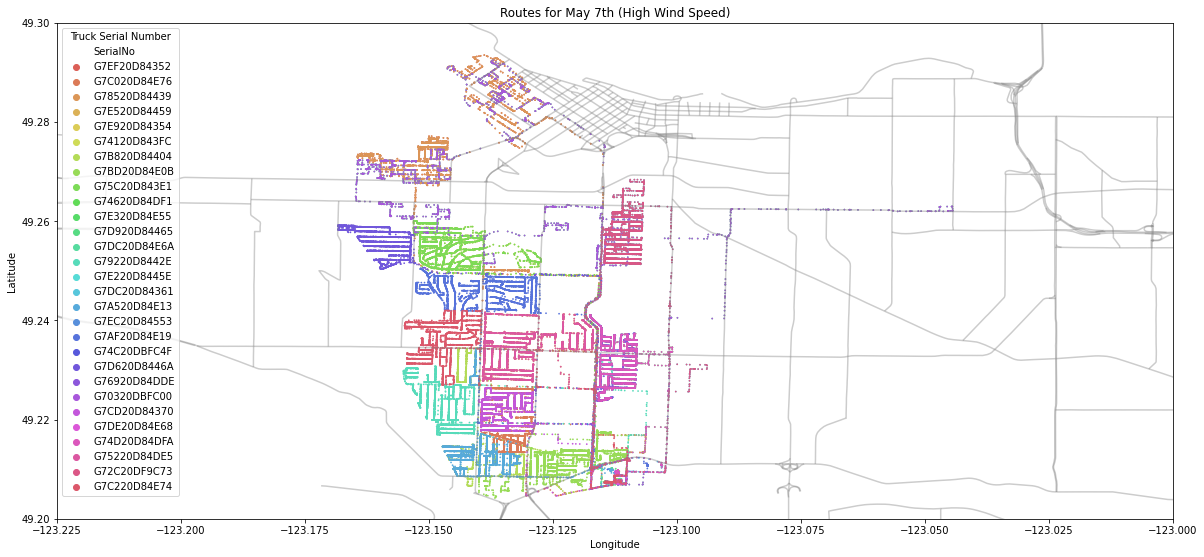

In [31]:
# plotting all routes on may 7th (wind)

fig, ax = plt.subplots(figsize=(20,20))

street_map.plot(ax=ax, alpha=0.4,color='grey')
sns.scatterplot(may7['longitude'], may7['latitude'], 
                hue=gps_df['SerialNo'], palette=palette, s=3, linewidth=0)


plt.title('Routes for May 7th (High Wind Speed)')
plt.legend(title='Truck Serial Number', loc = 'upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-123.225, -123)
plt.ylim(49.2,49.3)
plt.show()

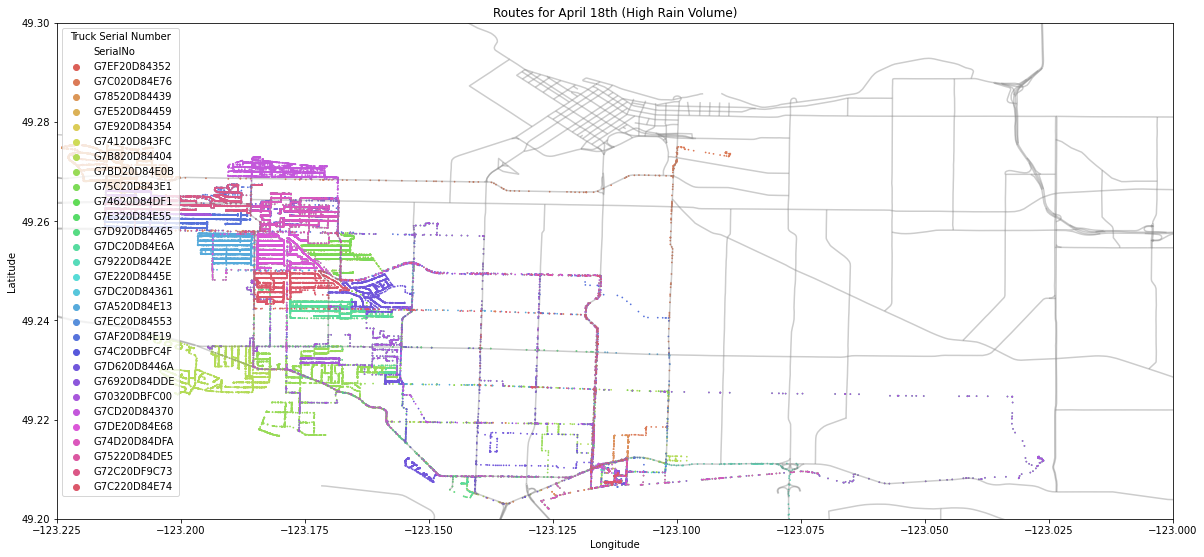

In [32]:
# plotting all routes on april 18th (rain)

fig, ax = plt.subplots(figsize=(20,20))

street_map.plot(ax=ax, alpha=0.4,color='grey')
sns.scatterplot(apr18['longitude'], apr18['latitude'], 
                hue=gps_df['SerialNo'], palette=palette, s=3, linewidth=0)


plt.title('Routes for April 18th (High Rain Volume)')
plt.legend(title='Truck Serial Number', loc = 'upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-123.225, -123)
plt.ylim(49.2,49.3)
plt.show()

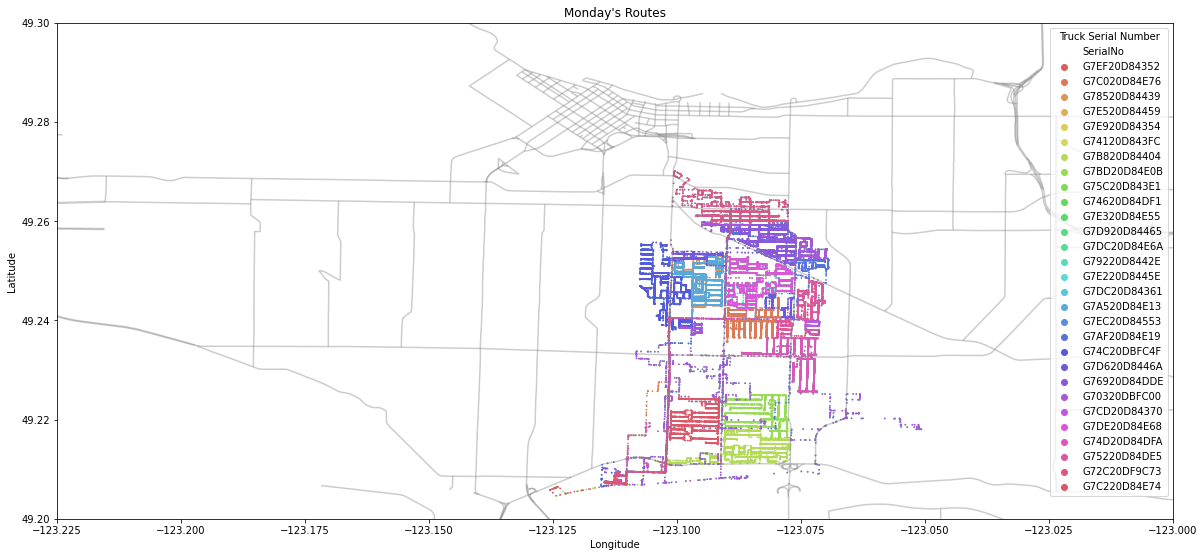

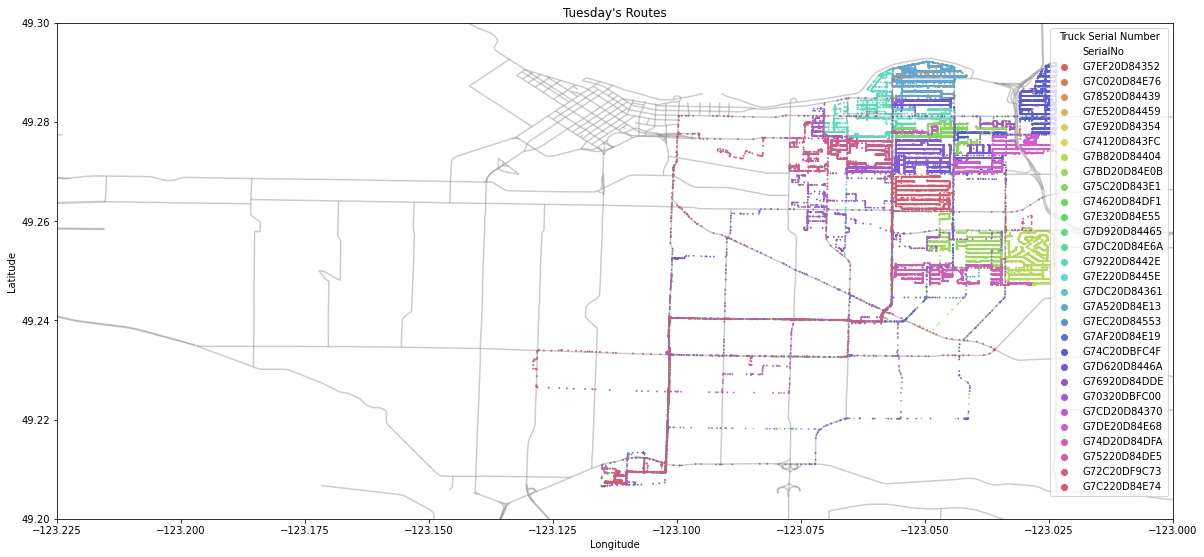

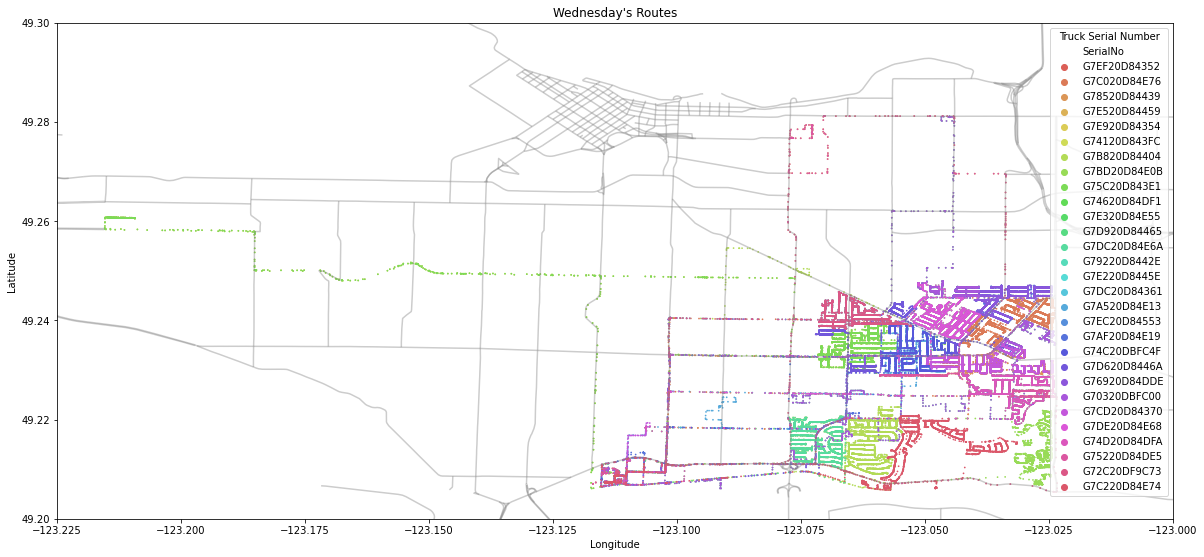

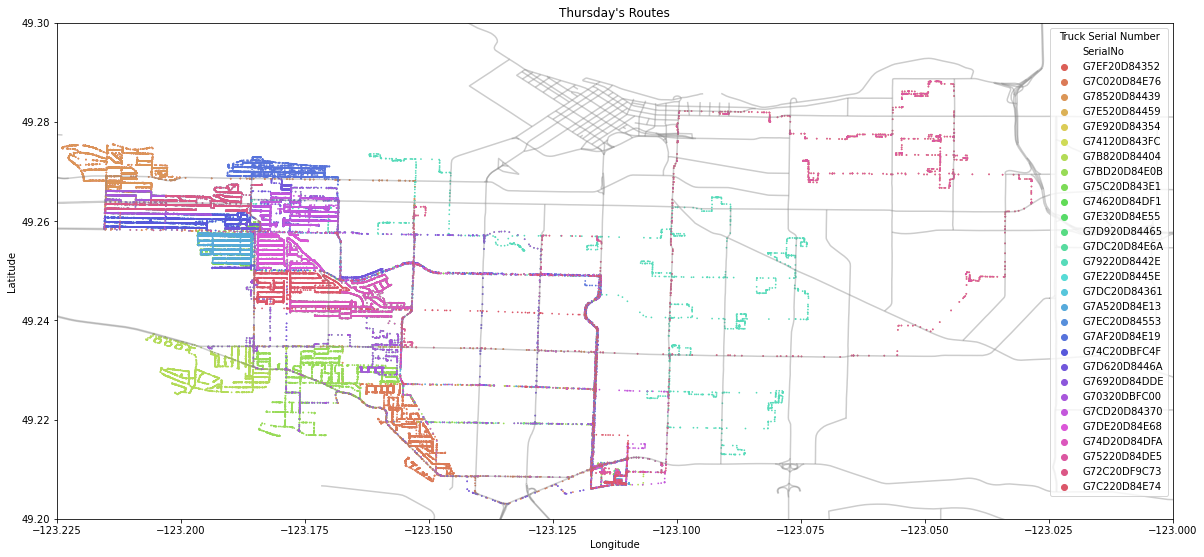

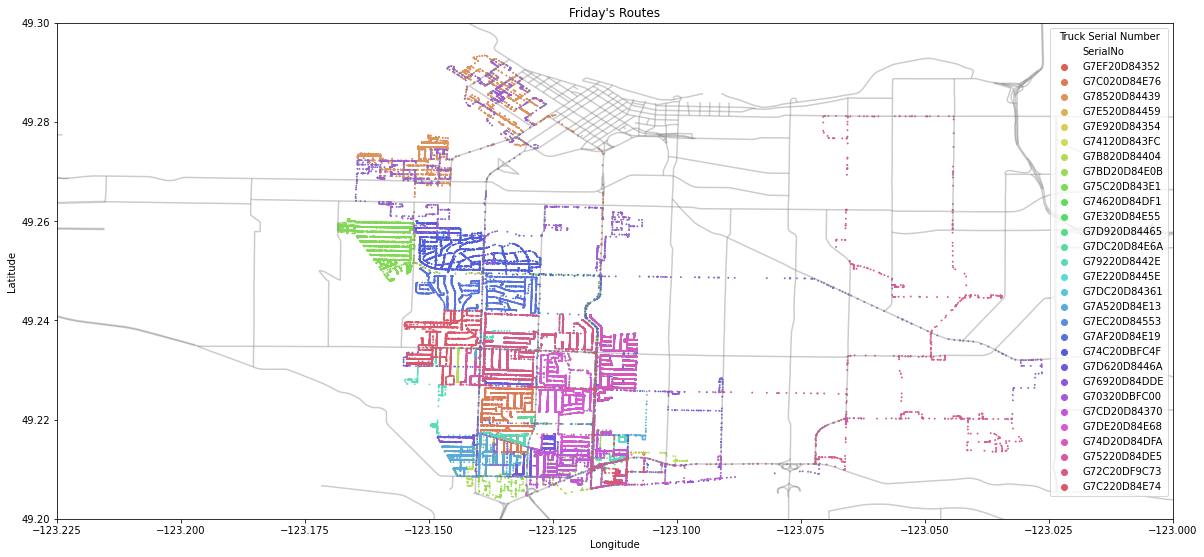

In [36]:
for i,j in zip(range(91,96),['Monday','Tuesday','Wednesday','Thursday','Friday']):
  df = gps_df[gps_df['Day']==i]
  fig, ax = plt.subplots(figsize=(20,20))
  street_map.plot(ax=ax, alpha=0.4,color='grey')
  sns.scatterplot(df['longitude'], df['latitude'], 
                hue=gps_df['SerialNo'], palette=palette, s=3, linewidth=0)

  plt.title(f'{j}\'s Routes')
  plt.legend(title='Truck Serial Number', loc = 'upper right')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.xlim(-123.225, -123)
  plt.ylim(49.2,49.3)
  plt.show()

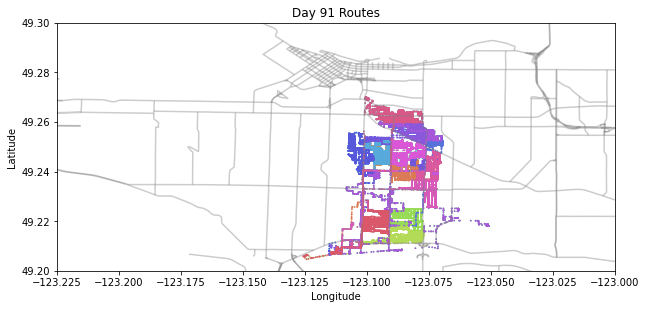

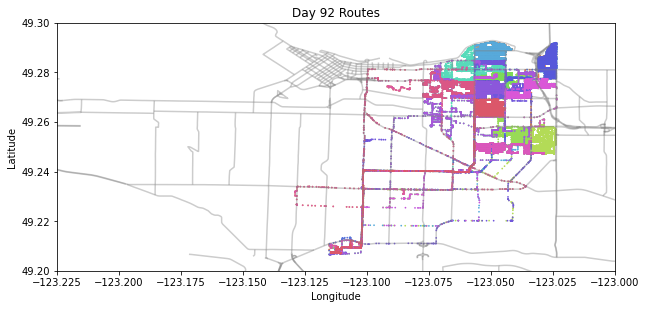

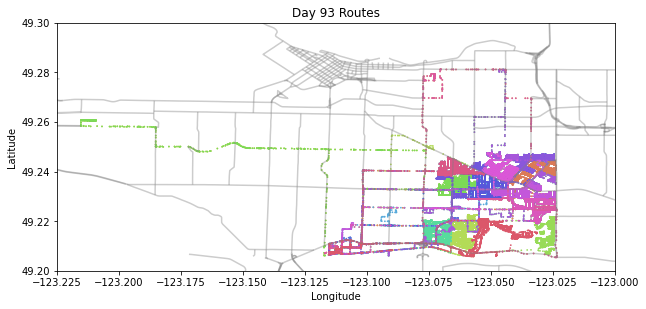

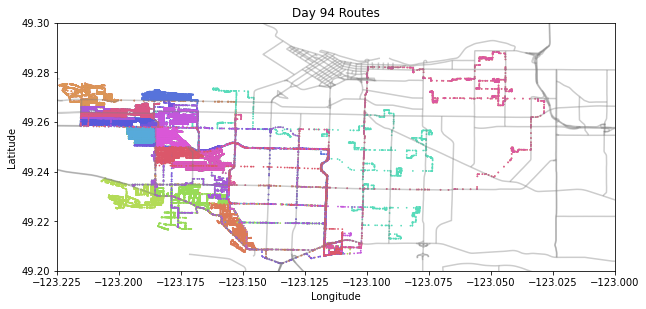

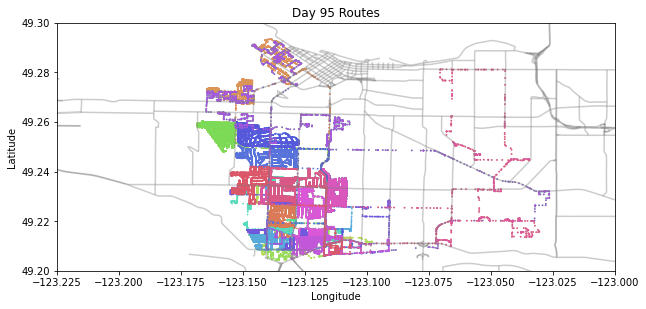

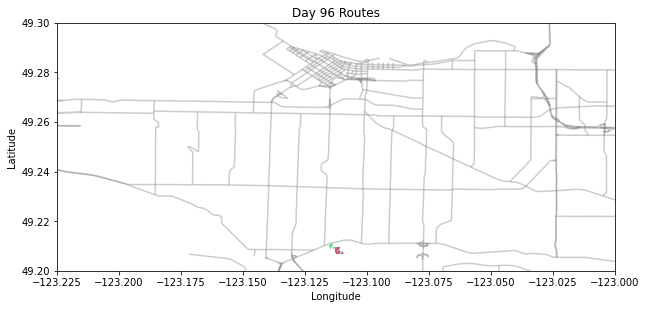

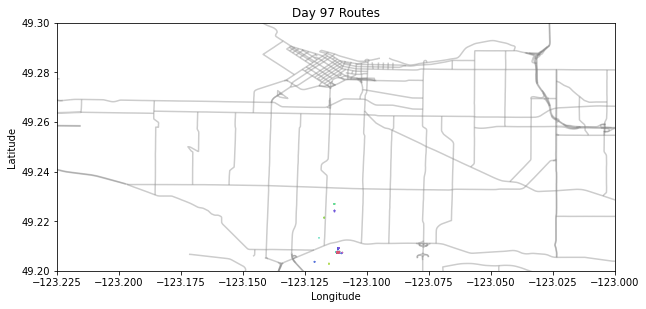

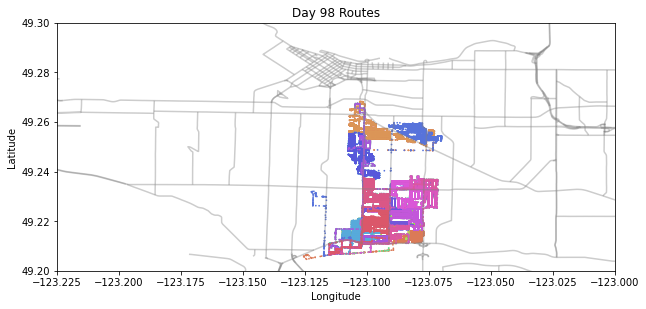

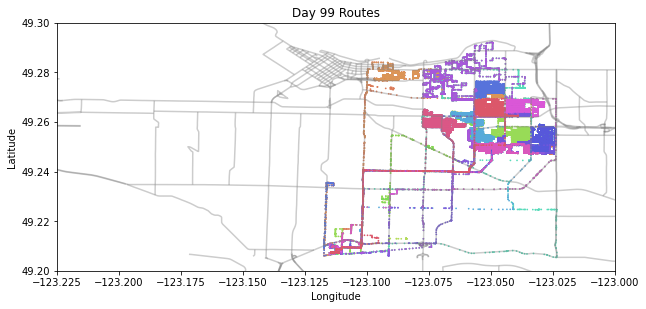

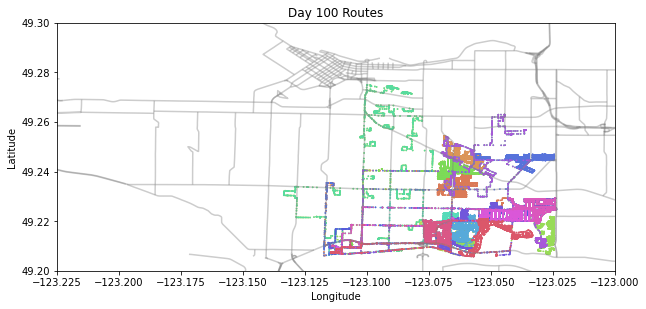

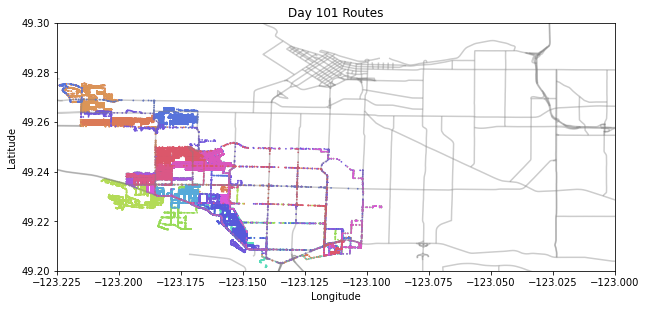

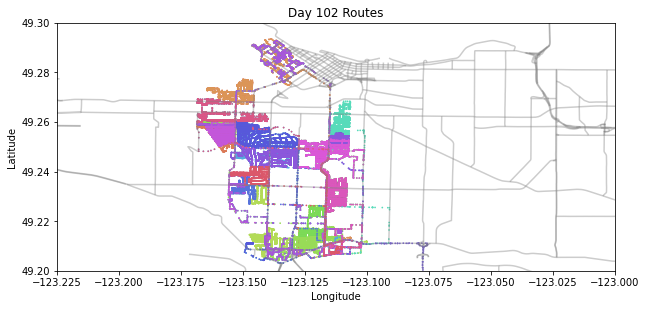

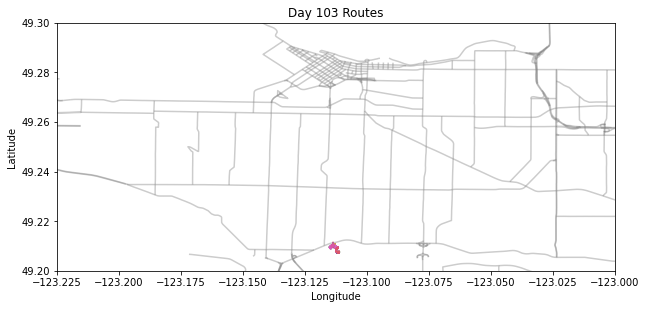

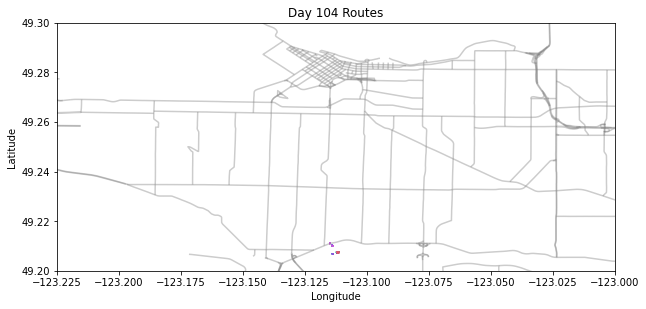

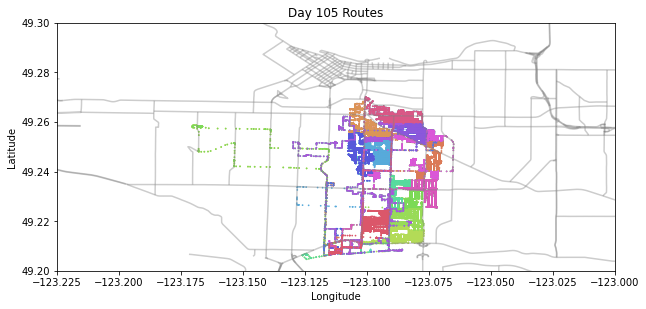

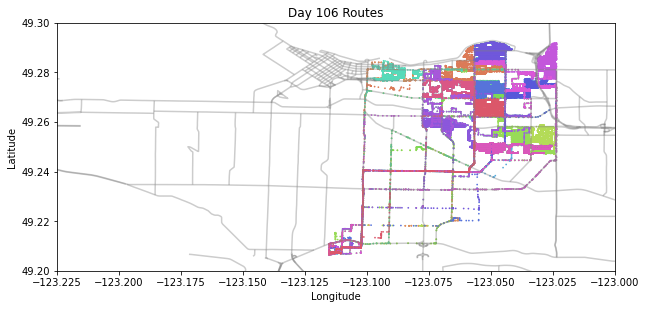

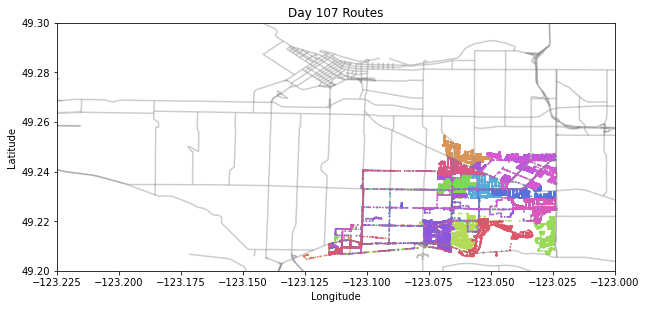

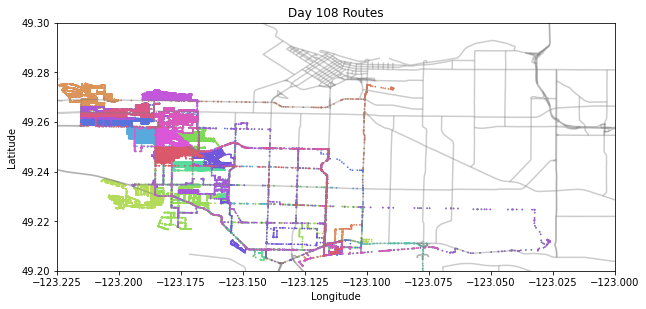

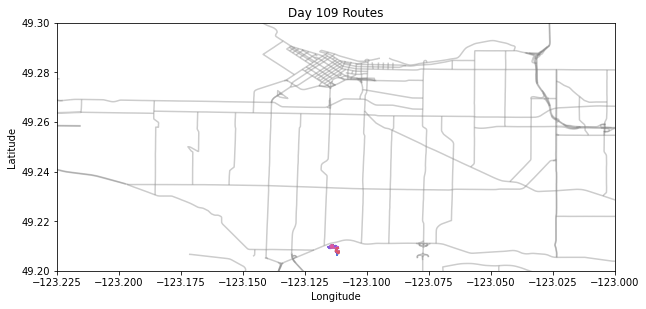

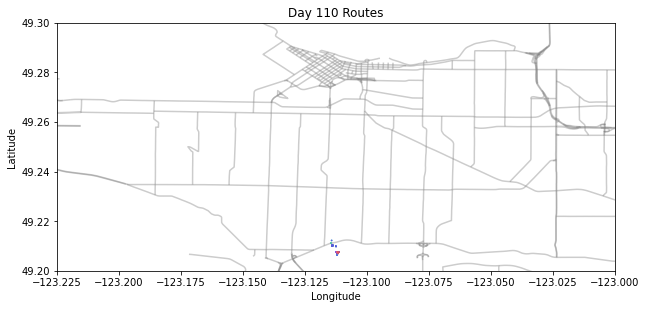

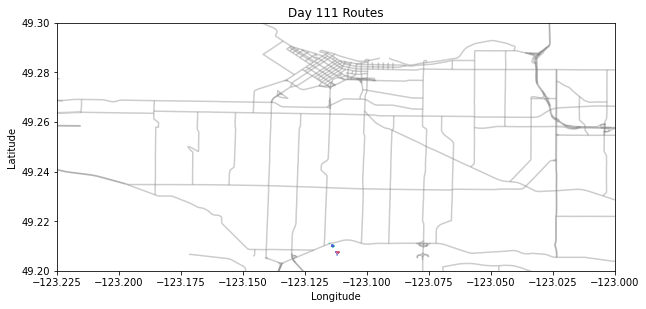

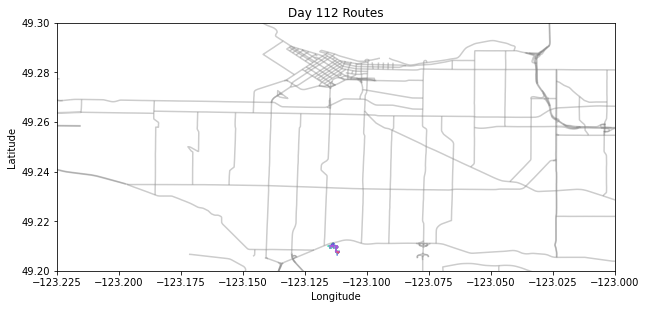

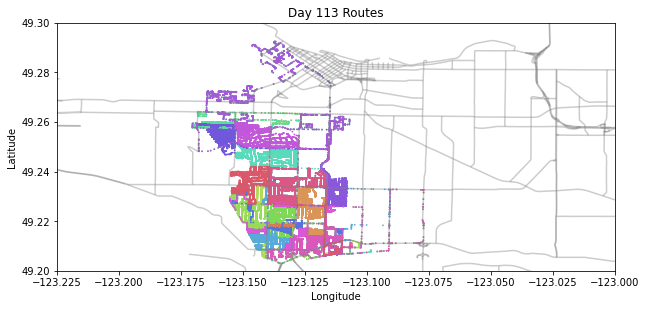

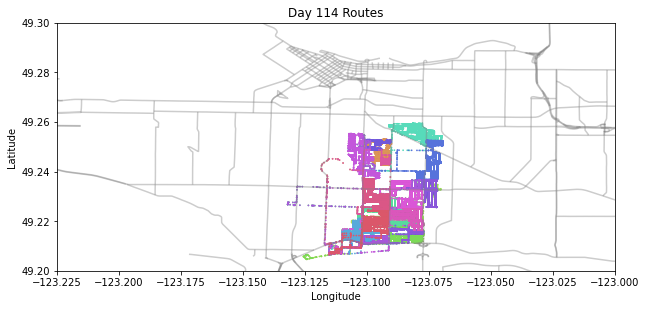

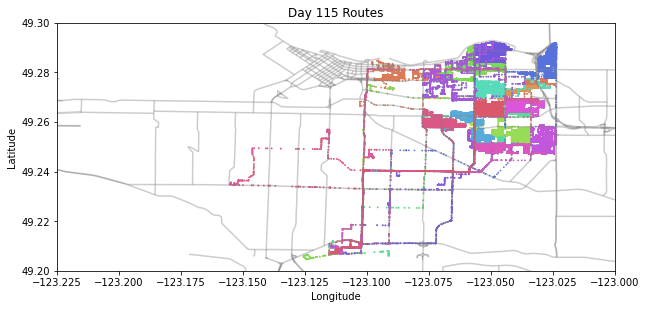

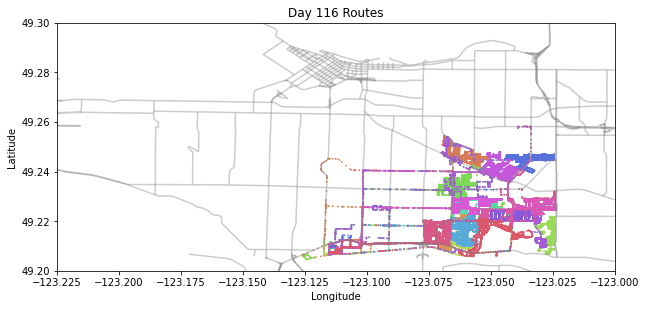

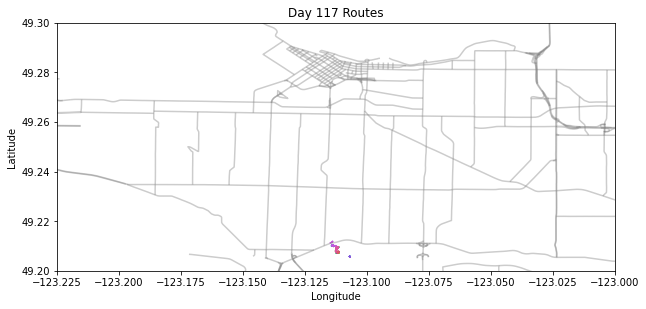

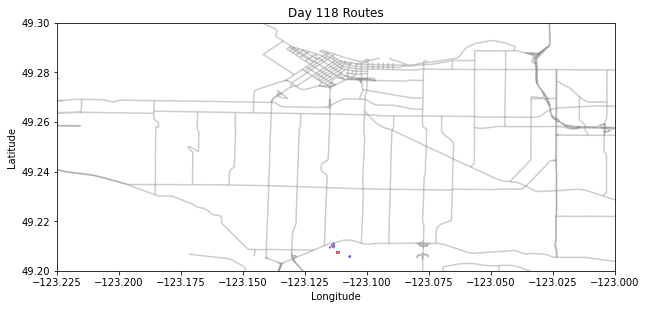

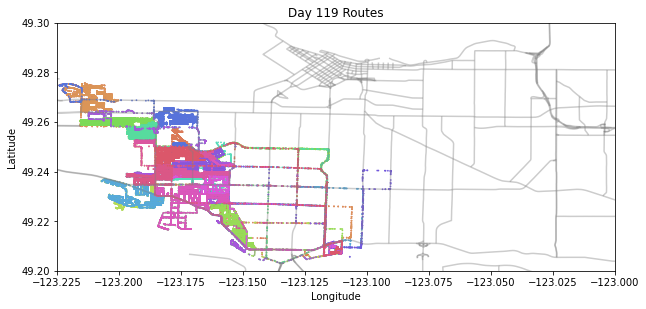

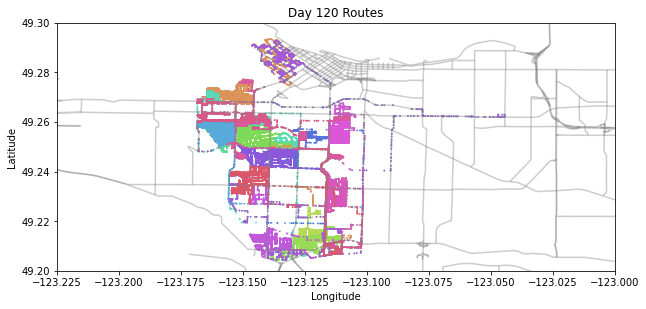

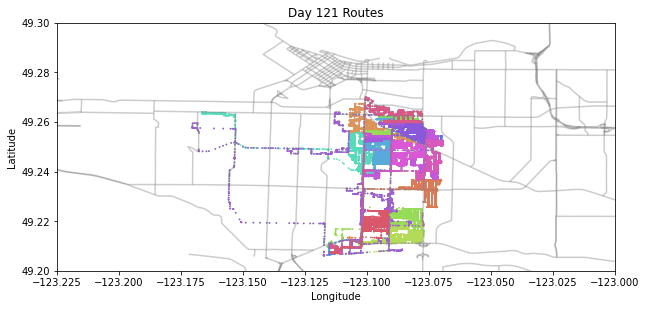

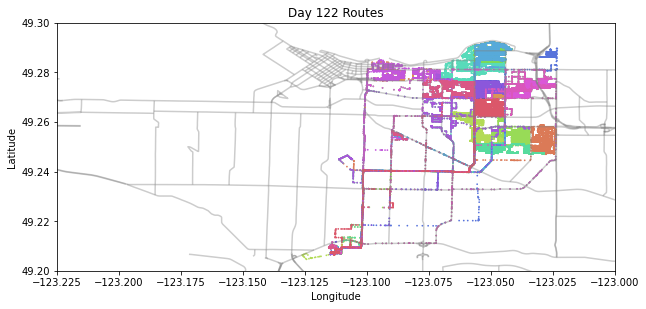

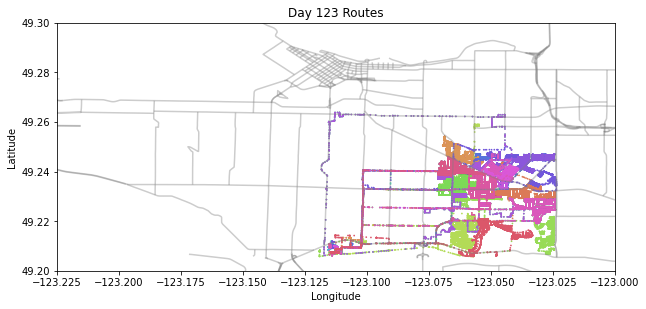

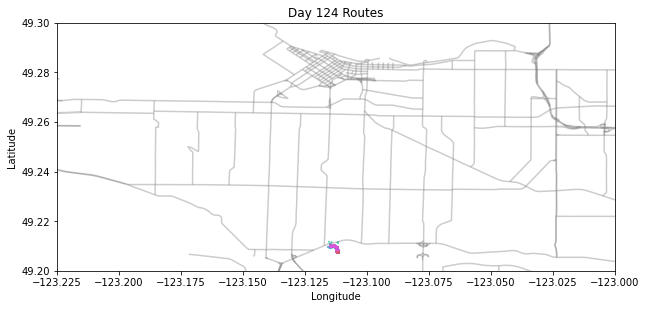

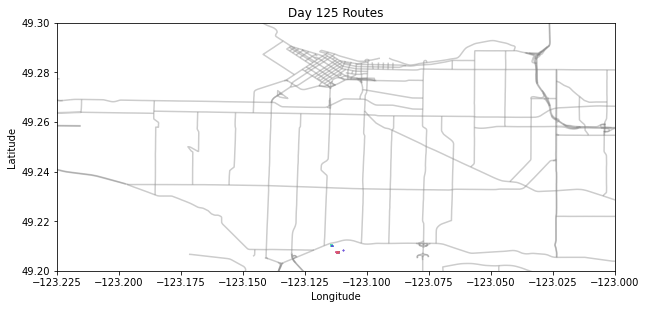

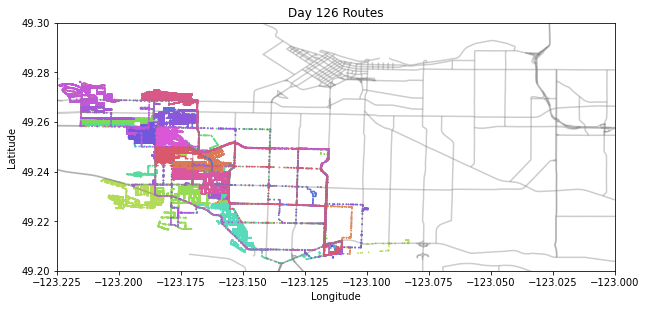

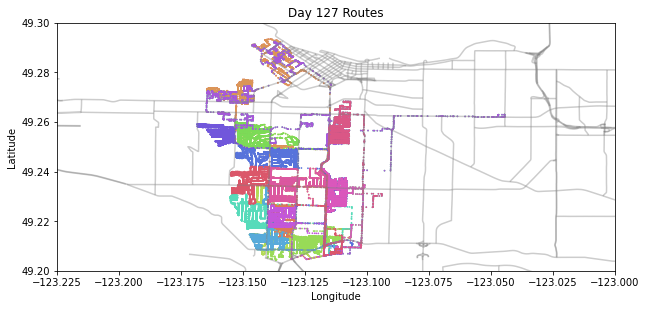

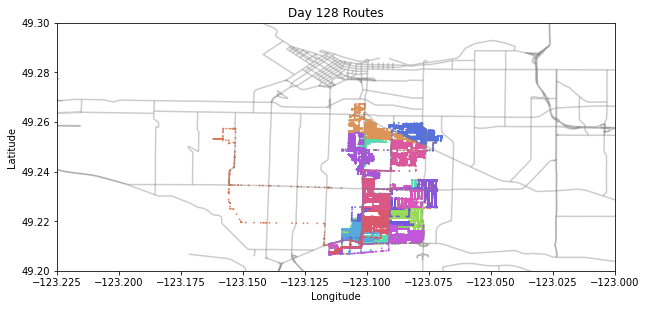

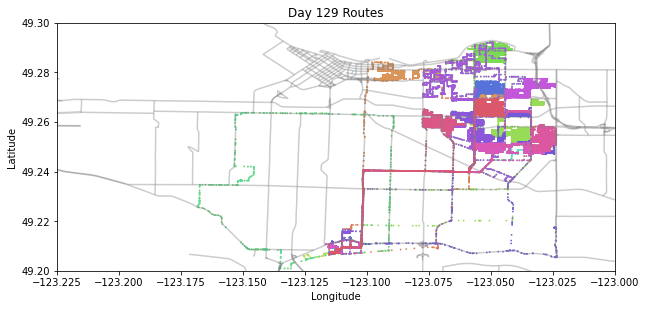

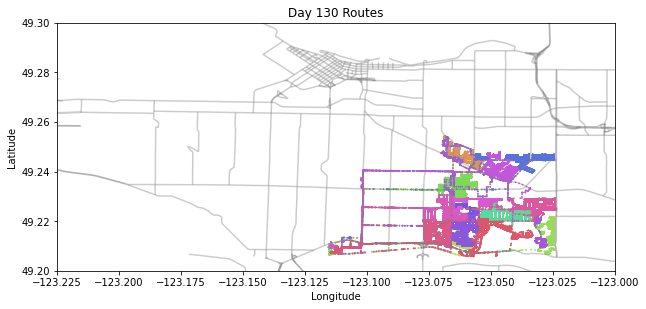

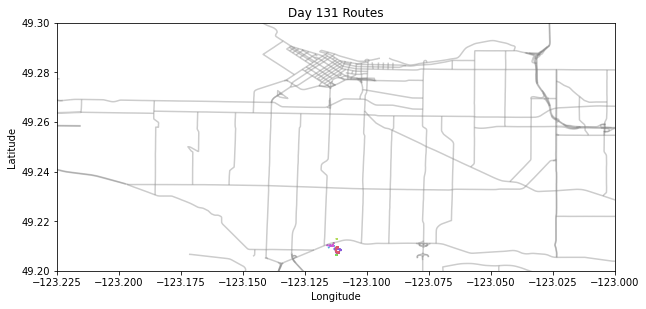

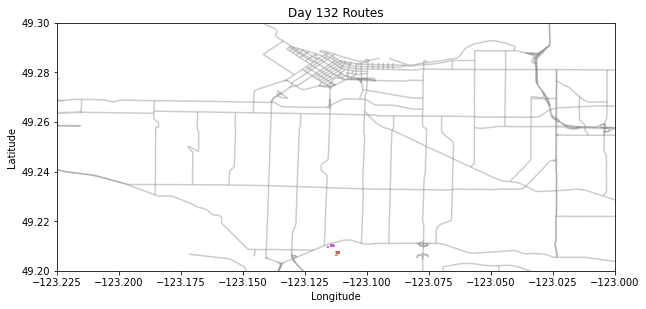

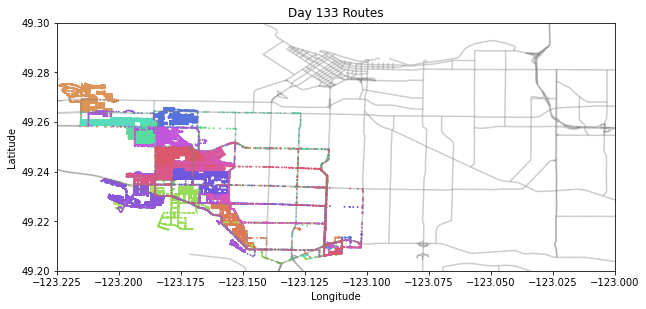

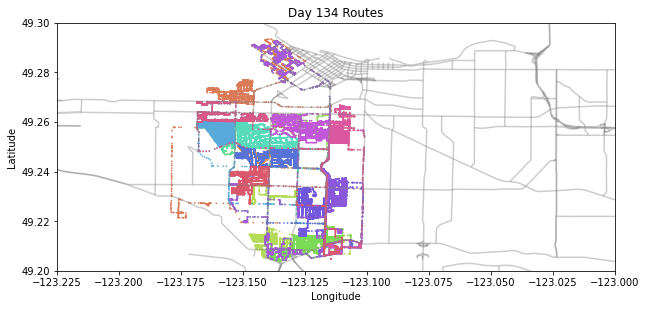

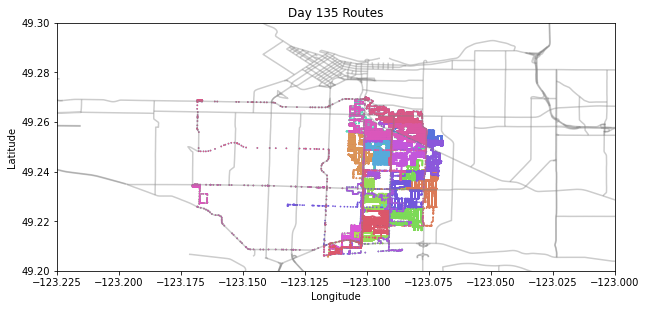

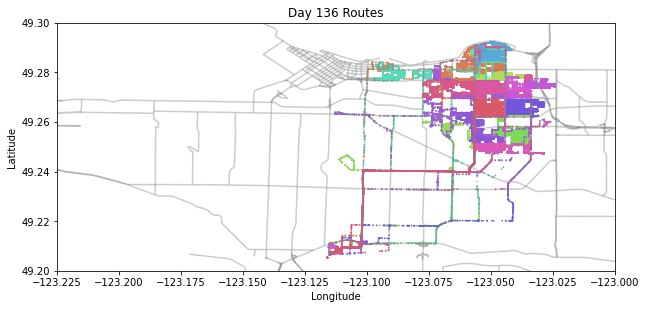

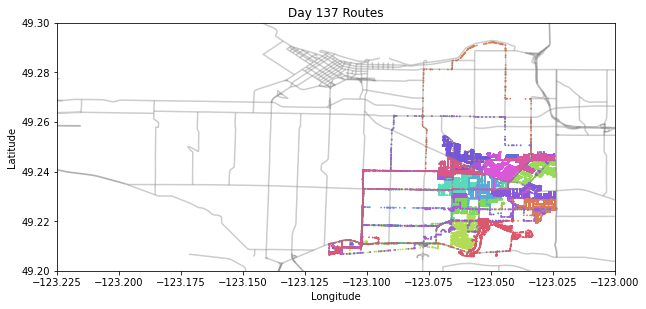

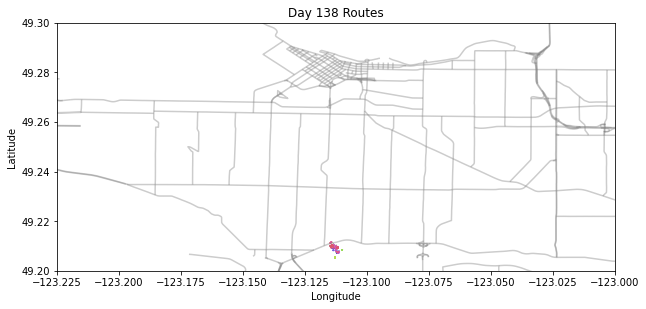

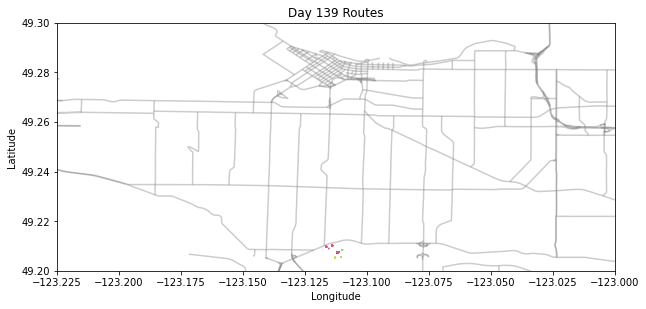

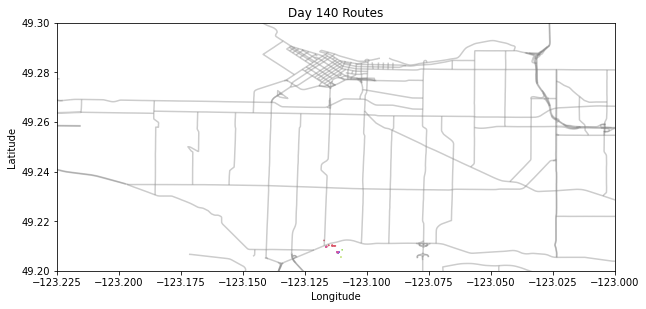

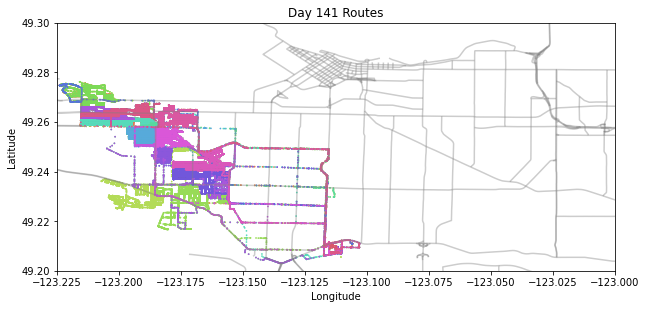

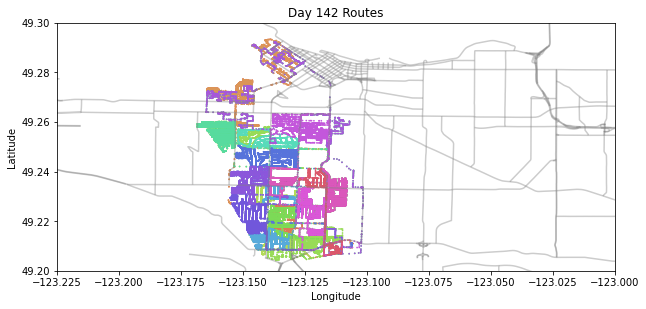

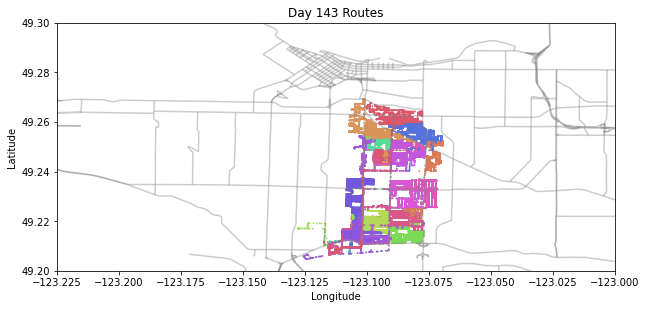

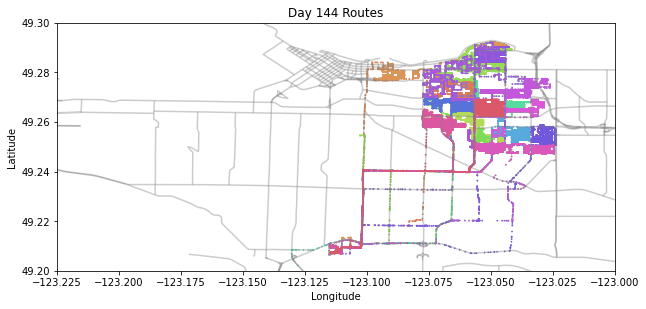

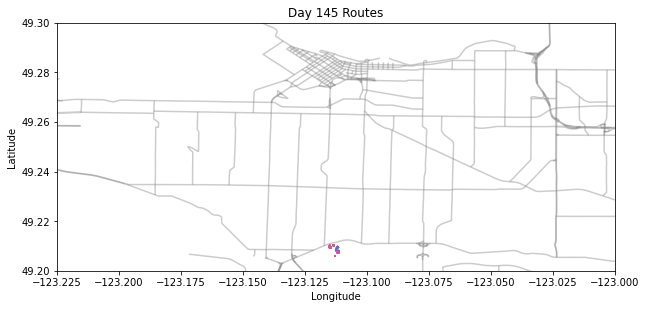

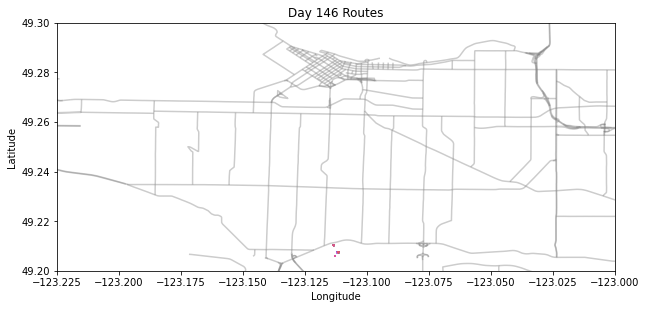

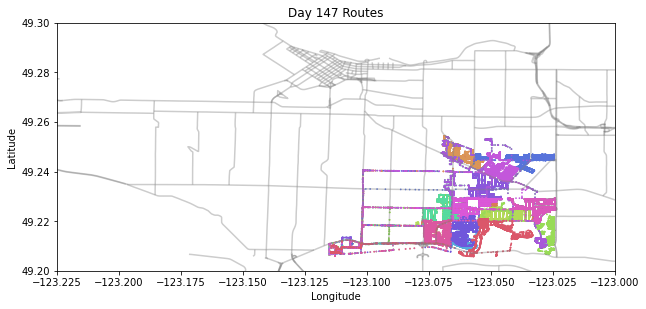

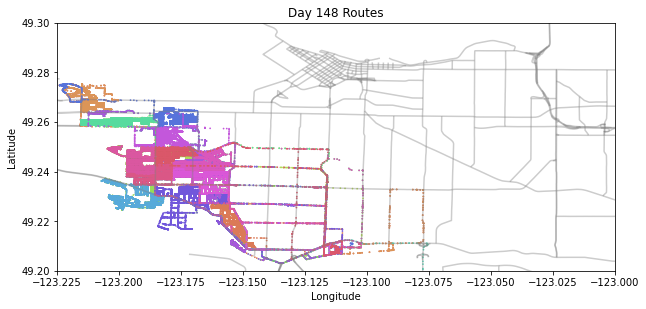

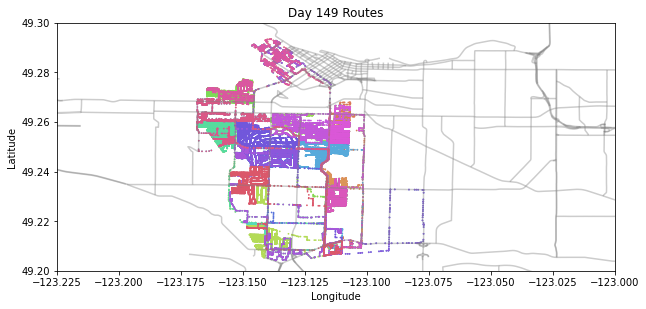

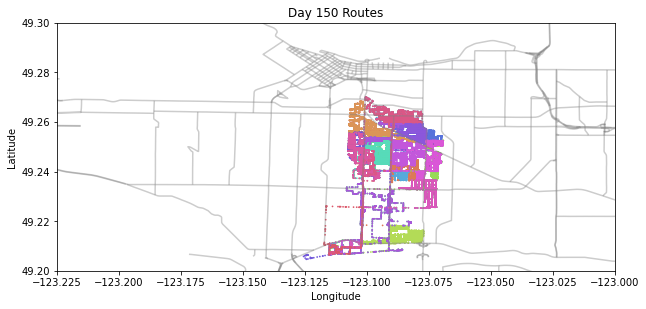

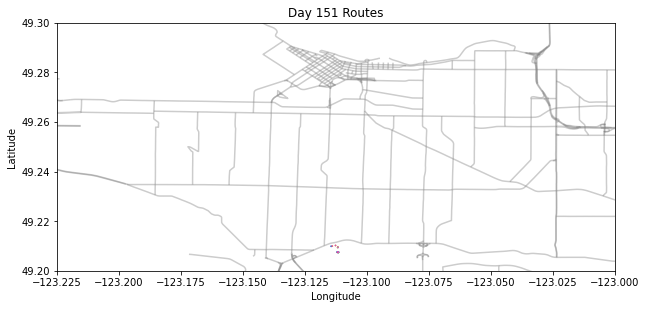

In [35]:
# mapping all routes

for i in gps_df['Day'].unique():
  df = gps_df[gps_df['Day']==i]
  fig, ax = plt.subplots(figsize=(10,10))
  street_map.plot(ax=ax, alpha=0.4,color='grey')
  sns.scatterplot(df['longitude'], df['latitude'], 
                hue=gps_df['SerialNo'], palette=palette, s=3, legend=False, linewidth=0)

  plt.title(f'Day {i} Routes')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.xlim(-123.225, -123)
  plt.ylim(49.2,49.3)
  plt.show()



